# Modeling and Evaluation

In [1]:
### ALL THE IMPORTS NEEDED FOR THIS PHASE

# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Understanding the results of an evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None)
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv", header=None)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120889, 37), (30223, 37), (120889, 1), (30223, 1))

In [4]:
X_train.head()

,purchase_value,age,seconds_between_purchase_signup,purchase_hour,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,...,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
0,0.712890,-0.017282,-1.138580,-0.653497,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.549086,0.678751,1.302103,-1.087733,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.198160,0.910763,-1.330176,-0.653497,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.549086,-0.133288,0.171997,0.504464,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-1.361965,1.258780,-0.339607,-0.364007,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [5]:
pd.Series(y_test[0]).value_counts()

0    27326
1     2897
Name: 0, dtype: int64

## Classification algorithms

* We recall that we seek to predict the outputs of a dichotomous variable, namely __class__.
* For the continuation, we will call class 0 (legal transactions) of variable __class__ the negative class, and class 1 (illegal transactions) will be referred to as the positive class. 

### Logistic Regression
#### Classic

In [6]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [7]:
print("Logistic Regression score on the training set :", log_reg.score(X_train, y_train))
print("Logistic Regression score on the test set :", log_reg.score(X_test, y_test))

Logistic Regression score on the training set : 0.9069063355640298
Logistic Regression score on the test set : 0.9041458491877047


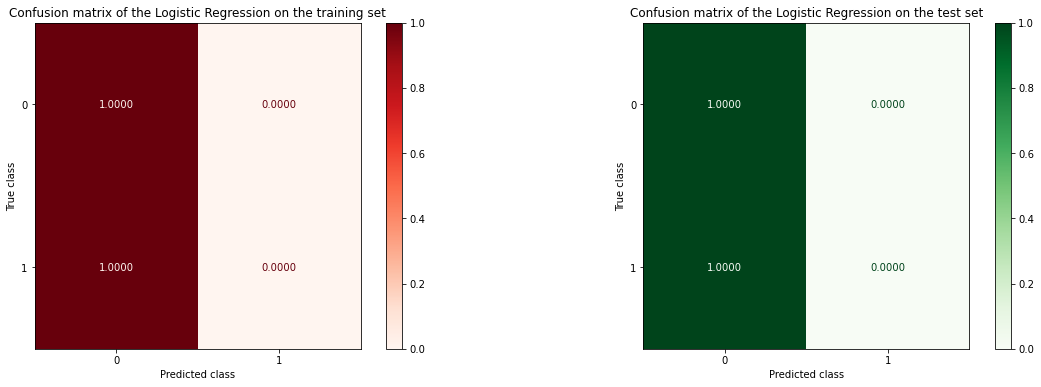

In [8]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(log_reg, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Logistic Regression on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(log_reg, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Logistic Regression on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

* On both training and test set, the model predicts the negative class all the time.
* As our data is highly unbalanced (more than 90% of the transactions are illegal), we got a good global score that actually corresponds to the proportion of samples from the negative class in the set 

In [9]:
print("Logistic Regression : classification metrics on the training set")
print(classification_report(y_train, log_reg.predict(X_train)))
print()
print("Logistic Regression : classification metrics on the test set")
print(classification_report(y_test, log_reg.predict(X_test)))

Logistic Regression : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    109635
           1       0.00      0.00      0.00     11254

    accuracy                           0.91    120889
   macro avg       0.45      0.50      0.48    120889
weighted avg       0.82      0.91      0.86    120889


Logistic Regression : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27326
           1       0.00      0.00      0.00      2897

    accuracy                           0.90     30223
   macro avg       0.45      0.50      0.47     30223
weighted avg       0.82      0.90      0.86     30223



* The metrics on the training and test set are pretty much the same.
* This confirms the fact that the model makes the same prediction for all the observations : the 'always predict the negative class' rule does not make it a good model at all.

In [10]:
log_reg_coef_ranking = pd.DataFrame(
    data=log_reg.coef_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Coefficient"])

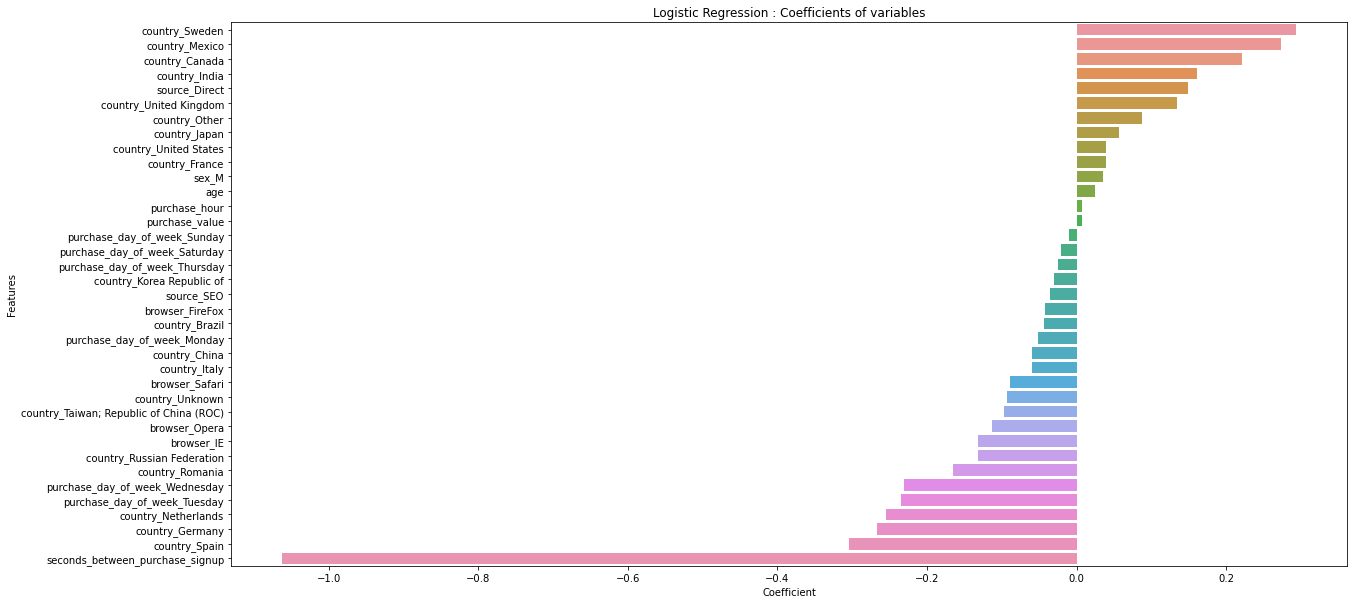

In [11]:
log_reg_coef_ranking = log_reg_coef_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=log_reg_coef_ranking, x="Coefficient", y=log_reg_coef_ranking.index)
plt.ylabel("Features")
plt.title("Logistic Regression : Coefficients of variables")
plt.show()

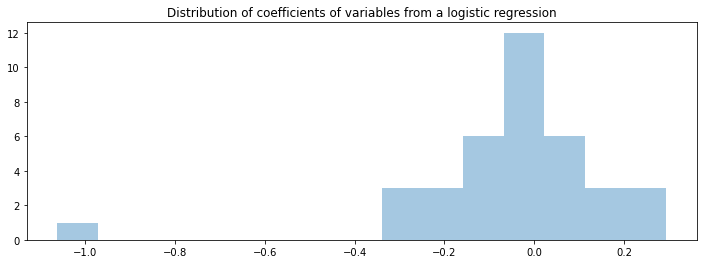

In [12]:
plt.figure(figsize=(12, 4))
sns.distplot(log_reg_coef_ranking, kde=False)
plt.title("Distribution of coefficients of variables from a logistic regression")
plt.show()

* As anticipated in the Data Understanding phase, the highest coefficient is that of the feature indicating the number of seconds elapsed between registration and purchase.
* In contrast, the other corfficients are very close to 0, this means that the corresponding variables have a small impact on the assessment of the probability that a transaction is fraudulent.

#### Balanced mode
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [13]:
log_reg_balanced = LogisticRegression(class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)
log_reg_balanced.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
print("Balanced Logistic Regression score on the training set :", log_reg_balanced.score(X_train, y_train))
print("Balanced Logistic Regression score on the test set :", log_reg_balanced.score(X_test, y_test))

Balanced Logistic Regression score on the training set : 0.6507457254175318
Balanced Logistic Regression score on the test set : 0.647950236574794


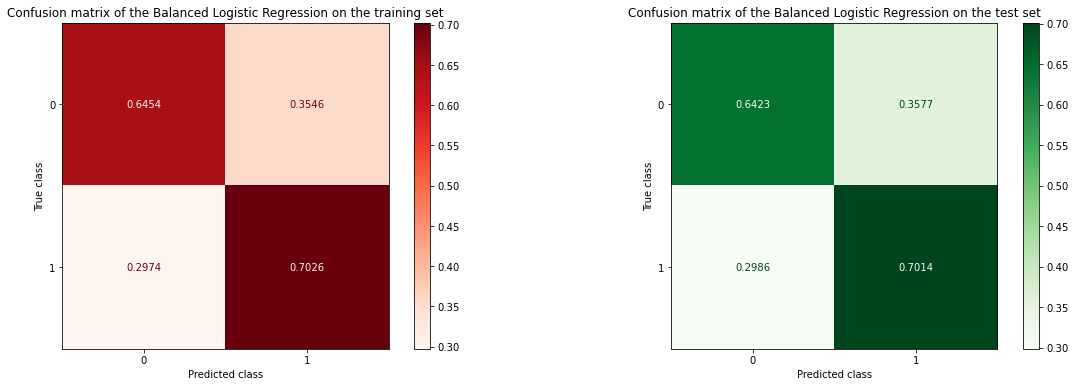

In [15]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(log_reg_balanced, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Balanced Logistic Regression on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(log_reg_balanced, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Balanced Logistic Regression on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

* On the training set, the balanced logistic regression model recognizes 64.54% of individuals from the negative class and 70.26% from the positive class.
* On the test set, the model predicts the right class of membership for 64.23% of individuals from the negative class and 70.14% of users from the positive class.

In [16]:
print("Balanced Logistic Regression : classification metrics on the training set")
print(classification_report(y_train, log_reg_balanced.predict(X_train)))
print()
print("Balanced Logistic Regression : classification metrics on the test set")
print(classification_report(y_test, log_reg_balanced.predict(X_test)))

Balanced Logistic Regression : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    109635
           1       0.17      0.70      0.27     11254

    accuracy                           0.65    120889
   macro avg       0.56      0.67      0.52    120889
weighted avg       0.88      0.65      0.72    120889


Balanced Logistic Regression : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     27326
           1       0.17      0.70      0.28      2897

    accuracy                           0.65     30223
   macro avg       0.56      0.67      0.52     30223
weighted avg       0.88      0.65      0.72     30223



* We see that the negative class f1-score remains good with a value of 0.77 on both training and test set.
* Regarding the positive class, even if the f1-score is very low, we see that the recall is good with a value of 0.70 on each set, that means 70% of the individuals from the positive class are detected.

In [17]:
log_reg_balanced_coef_ranking = pd.DataFrame(
    data=log_reg_balanced.coef_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Coefficient"])
log_reg_balanced_coef_ranking = log_reg_balanced_coef_ranking.sort_values(by="Coefficient", ascending=False)

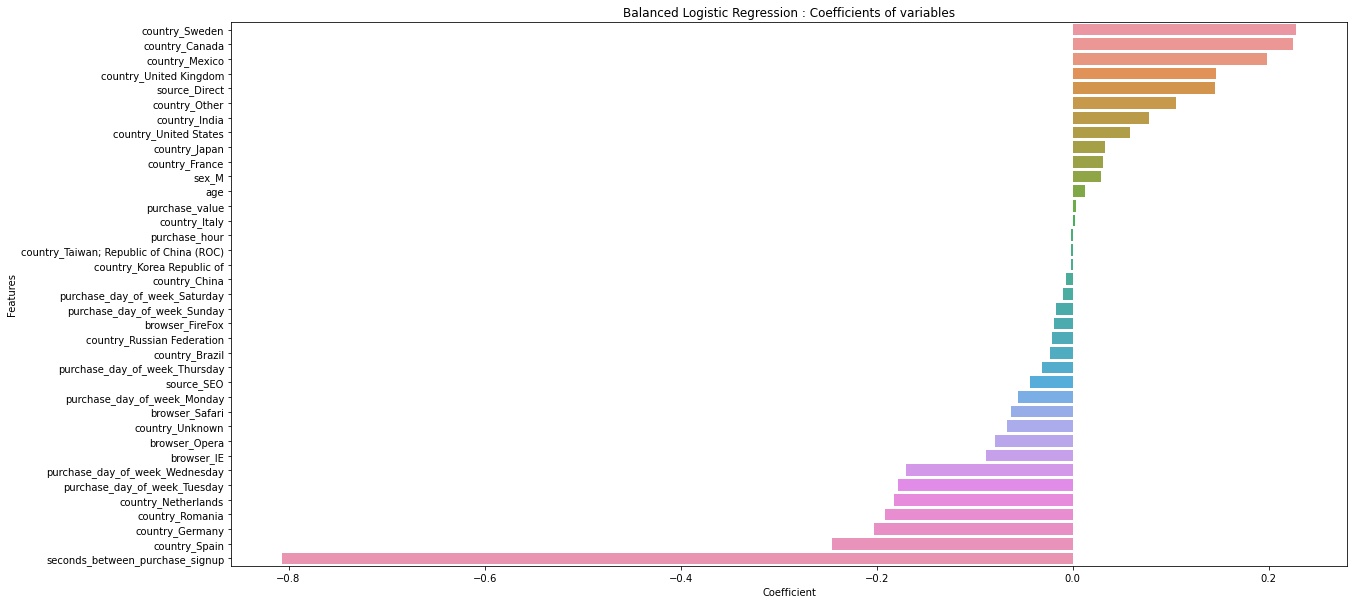

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(data=log_reg_balanced_coef_ranking, x="Coefficient", y=log_reg_balanced_coef_ranking.index)
plt.ylabel("Features")
plt.title("Balanced Logistic Regression : Coefficients of variables")
plt.show()

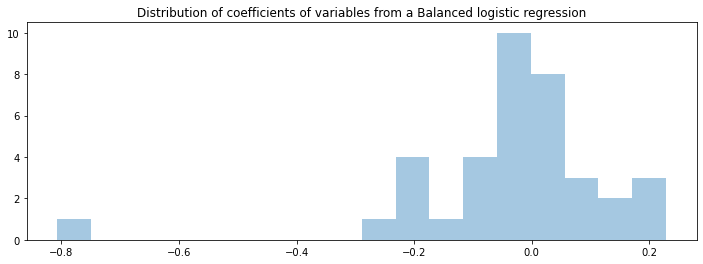

In [19]:
plt.figure(figsize=(12, 4))
sns.distplot(log_reg_balanced_coef_ranking, kde=False)
plt.title("Distribution of coefficients of variables from a Balanced logistic regression")
plt.show()

* The same remarks can be made as for the first logistic regression : all the variables except one have their coefficient close to 0, in other words a very low impact on the target variable.
* The most influent feature remains that of the one giving the number of seconds elapsed between the registration and the purchase.

#### Weighted mode
A logistic regression is performed by assigning different weights to the observations according to the class to which they belong.

In [20]:
# weights applied in the BALANCED mode
y_train.size / (2 * np.bincount(y_train.values.flatten()))

array([0.55132485, 5.37093478])

In [21]:
# weights we will apply
sorted(np.bincount(y_train.values.flatten()) / y_train.size)

[0.09309366443597018, 0.9069063355640298]

In [22]:
log_reg_weighted = LogisticRegression(class_weight={0 : 0.09309366, 1 : 0.90690634})
log_reg_weighted.fit(X_train, y_train)
log_reg_weighted.get_params()

{'C': 1.0,
 'class_weight': {0: 0.09309366, 1: 0.90690634},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
print("Weighted Logistic Regression score on the training set :", log_reg_weighted.score(X_train, y_train))
print("Weighted Logistic Regression score on the test set :", log_reg_weighted.score(X_test, y_test))

Weighted Logistic Regression score on the training set : 0.6506795490077675
Weighted Logistic Regression score on the test set : 0.6479833239585746


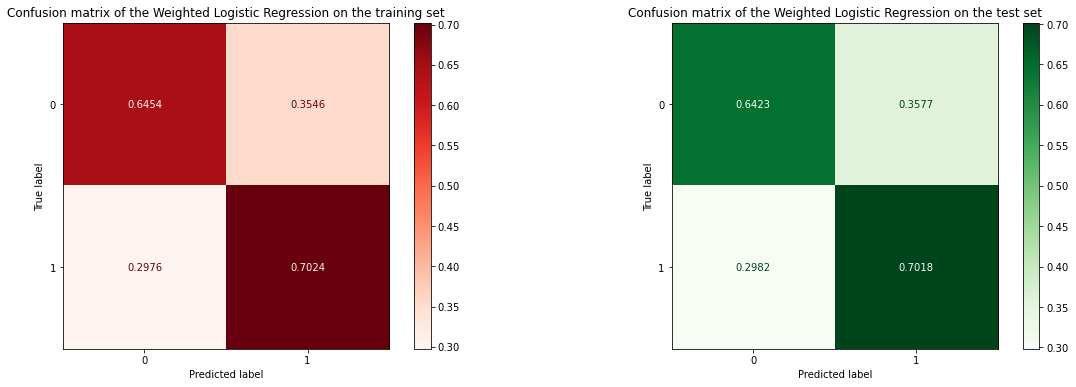

In [24]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(log_reg_weighted, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Weighted Logistic Regression on the training set")

plot_confusion_matrix(log_reg_weighted, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Weighted Logistic Regression on the test set")

plt.show()

In [25]:
print("Weighted Logistic Regression : classification metrics on the training set")
print(classification_report(y_train, log_reg_weighted.predict(X_train)))
print()
print("Weighted Logistic Regression : classification metrics on the test set")
print(classification_report(y_test, log_reg_weighted.predict(X_test)))

Weighted Logistic Regression : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    109635
           1       0.17      0.70      0.27     11254

    accuracy                           0.65    120889
   macro avg       0.56      0.67      0.52    120889
weighted avg       0.88      0.65      0.72    120889


Weighted Logistic Regression : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     27326
           1       0.17      0.70      0.28      2897

    accuracy                           0.65     30223
   macro avg       0.56      0.67      0.52     30223
weighted avg       0.88      0.65      0.72     30223



The weighted logistic regression produces the same results as the balanced logistic regression.

### Random Forest
#### Classic

Let us look at the results obtained after carrying out a ramdom forest composed of 100 decisions trees.

In [26]:
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
rand_forest.fit(X_train, y_train)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
print("Random forest score on the training set :", rand_forest.score(X_train, y_train))
print("Random forest score on the test set :", rand_forest.score(X_test, y_test))

Random forest score on the training set : 0.9567123559629082
Random forest score on the test set : 0.956390828177216


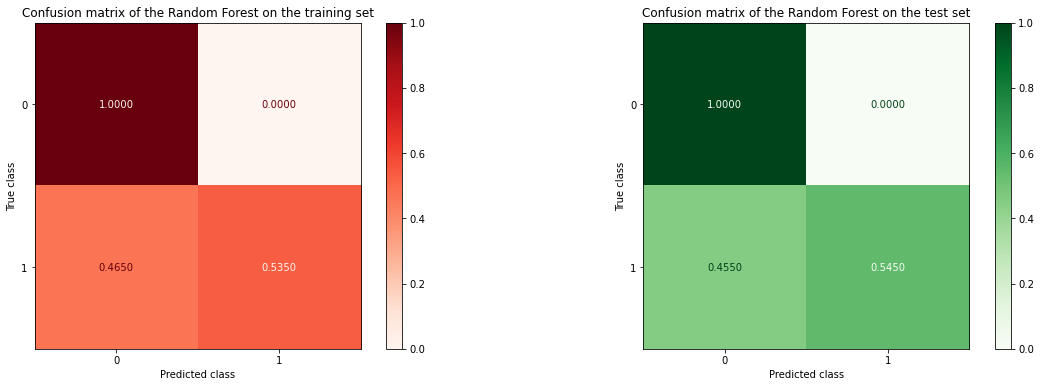

In [28]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(rand_forest, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Random Forest on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(rand_forest, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Random Forest on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

* Regarding the majority class (negative class), the random forest model predicts the right class at 100% on both training and test set.
* Compared to the classic logistic regression model, this model is better since it correctly identifies a little bit more than 50% of the illegal transactions (positive class) in the two sets.

In [29]:
print("Random forest : classification metrics on the training set")
print(classification_report(y_true=y_train, y_pred=rand_forest.predict(X_train)))
print()
print("Random forest : classification metrics on the test set")
print(classification_report(y_true=y_test, y_pred=rand_forest.predict(X_test)))

Random forest : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    109635
           1       1.00      0.54      0.70     11254

    accuracy                           0.96    120889
   macro avg       0.98      0.77      0.84    120889
weighted avg       0.96      0.96      0.95    120889


Random forest : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27326
           1       1.00      0.55      0.71      2897

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



* The positive class f1-score is good (greater than 0.70) and the negative class f1-score is excellent (0.98).
* By focusing on the positive class, we notice that the precision is perfect and, as we saw it in the confusion matrix, the recall is average, that means the model recognises a little bit more than 50% of the transactions that are identified as fraudulent.

In [30]:
feature_importance_rand_forest = pd.DataFrame(
    data=rand_forest.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance_rand_forest = feature_importance_rand_forest.sort_values(by="Score", ascending=False)

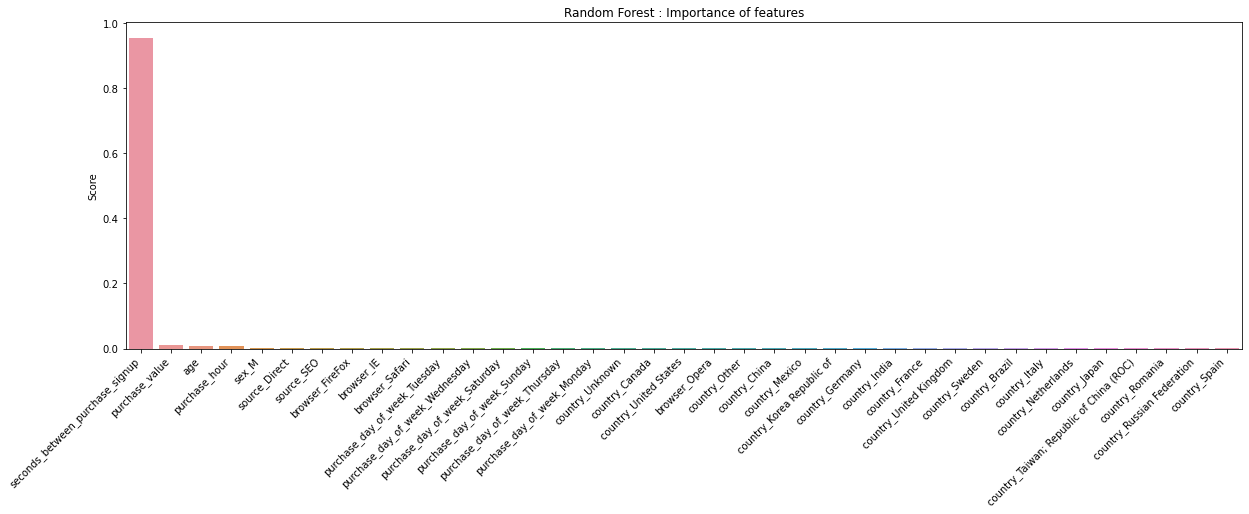

In [31]:
plt.figure(figsize=(20,6))

plt.title("Random Forest : Importance of features")
ax = sns.barplot(data=feature_importance_rand_forest, y="Score", x=feature_importance_rand_forest.index)
ax.set_xticklabels(feature_importance_rand_forest.index, rotation=45, ha="right")

plt.show()

* The variable counting the time elapsed in seconds between the creation of the account and the purchase by the user is by far the most important compared to the other features (score above 0.9).
* The other variables have almost no role in the classification of transactions.

#### Balanced Mode

Although the random forest model handled the unbalanced data better than the classical logistic regression model, we will see if the balanced mode can do better.

In [32]:
rand_forest_balanced = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced")
rand_forest_balanced.fit(X_train, y_train)
rand_forest_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
print("Balanced Random forest score on the training set :", rand_forest_balanced.score(X_train, y_train))
print("Balanced Random forest score on the test set :", rand_forest_balanced.score(X_test, y_test))

Balanced Random forest score on the training set : 0.9567206280141287
Balanced Random forest score on the test set : 0.9563577407934355


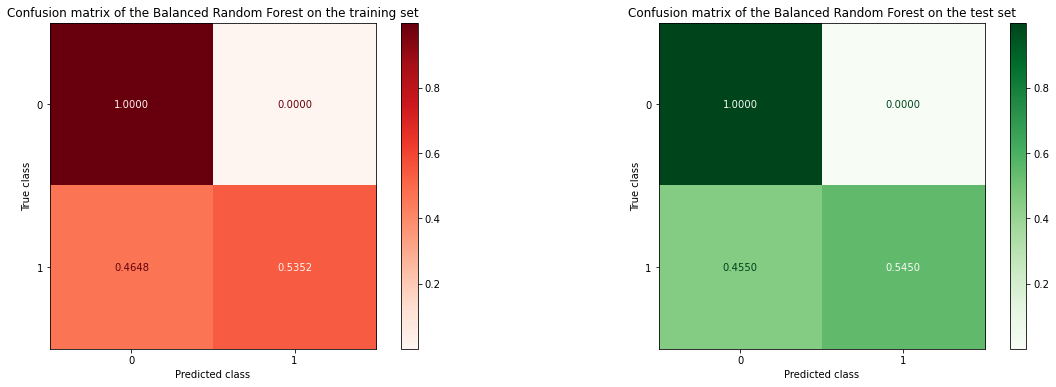

In [34]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)

plot_confusion_matrix(rand_forest_balanced, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Confusion matrix of the Balanced Random Forest on the training set")
axs[0].set_xlabel("Predicted class")
axs[0].set_ylabel("True class")

plot_confusion_matrix(rand_forest_balanced, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Confusion matrix of the Balanced Random Forest on the test set")
axs[1].set_xlabel("Predicted class")
axs[1].set_ylabel("True class")

plt.show()

In [35]:
print("Balanced Random forest : classification metrics on the training set")
print(classification_report(y_true=y_train, y_pred=rand_forest_balanced.predict(X_train)))
print()
print("Balanced Random forest : classification metrics on the test set")
print(classification_report(y_true=y_test, y_pred=rand_forest_balanced.predict(X_test)))

Balanced Random forest : classification metrics on the training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    109635
           1       1.00      0.54      0.70     11254

    accuracy                           0.96    120889
   macro avg       0.98      0.77      0.84    120889
weighted avg       0.96      0.96      0.95    120889


Balanced Random forest : classification metrics on the test set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27326
           1       1.00      0.55      0.71      2897

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



The balanced random forest model gives the same results as the classical one.